<a href="https://colab.research.google.com/github/Rezquellah/ML-Intro/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction 

In this project I have used kaggle car dataset that can be found on the link below: 

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv

The main purpose of this notebook is to apply my knowledge about linear regression, I'll cover each step in details. 


### Importing the required librairies

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### Loading the Dataset using pandas library

In [8]:
data = pd.read_csv("car_data.csv")

In [9]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Exploratory Data Analysis (EDA): 

The first step is to perform some EDA on the dataset we want to understand the structure and characteristics of the dataset. This includes checking for missing values, data types, summary statistics, and data distributions.

#### Check for missing values
The below code will count how many null values are founded on each columns, luckily there is no missing values on the dataset.

In [5]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Data types

1. **Car_Name**: Categorical variable representing the name of the car.

2. **Year**: Numerical variable representing the year when the car was bought.

3. **Selling_Price**: Numerical variable representing the price at which the car was sold.

4. **Present_Price**: Numerical variable representing the current showroom price of the car.

5. **Kms_Driven**: Numerical variable representing the total distance driven by the car.

6. **Fuel_Type**: Categorical variable representing the type of fuel used by the car (Petrol/Diesel/CNG).

7. **Seller_Type**: Categorical variable representing the type of seller (Dealer/Individual).

8. **Transmission**: Categorical variable representing the type of transmission (Automatic/Manual).

9. **Owner**: Numerical variable representing the number of owners the car has had.

All of the data types are appropriate for their respective variables. 

In [6]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

#### Descriptive statistics

<font color = 'brown'>count</font>: the number of non-missing values for each variable.

<font color = 'brown'>mean</font>: the average value of each variable.

<font color = 'brown'>std</font>: the standard deviation of each variable.

<font color = 'brown'>min</font>: the minimum value of each variable.

<font color = 'brown'>25%</font>: the 25th percentile of each variable.

<font color = 'brown'>50%</font>: the 50th percentile or median of each variable.

<font color = 'brown'>75%</font>: the 75th percentile of each variable.

<font color = 'brown'>max</font>: the maximum value of each variable.

<font color = 'blue'>We can see that the average **Selling_Price** of the cars is **4.66**, with a standard deviation of **5.08**. The minimum selling price of a car is **0.1** and the maximum is **35**. The **Kms_Driven** variable has a mean of **36947**, with a standard deviation of **38886.88**, indicating a wide range of values in this variable.</font>

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
# Compute the mode for Selling_price
mode = data['Selling_Price'].mode().values[0]
mode

0.45

#### Frequency tables

Let's create frequency tables for categorical variables **Fuel_type**, **Seller_Type** and **Transmission**  to show the number or proportion of cars that fall into each category.

The frequency table for **Fuel_Type**, indicate that <font color='green'>**petrol**</font> is the most common fuel type, with 239 cars running on petrol,follwed by <font color = 'orange'>**diesel**</font> (60 cars) and <font color = 'red'>**CNG**</font> (2 cars). Therefore we can confirm  that petrol is the most popular fuel type among car buyers in this dataset.

Regarding the **Seller_Type**, there are more cars sold by <font color = 'green'>**dealers**</font> (195 cars) than by <font color='orange'>**individuals**</font> (106 cars). This suggests that dealers play a significant role in the car market represented in this dataset.

Finally, the frequency table for **Transmission**, we can see that <font color = 'green'>**manual**</font> transmissions are much more common (261 cars) than <font color = 'orange'>**automatic**</font> transmissions (40 cars). This tells us that manual transmissions are more popular among car buyers in this dataset.


In [23]:
print(data['Fuel_Type'].value_counts(), '\n')
print(data['Seller_Type'].value_counts(), '\n')
print(data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


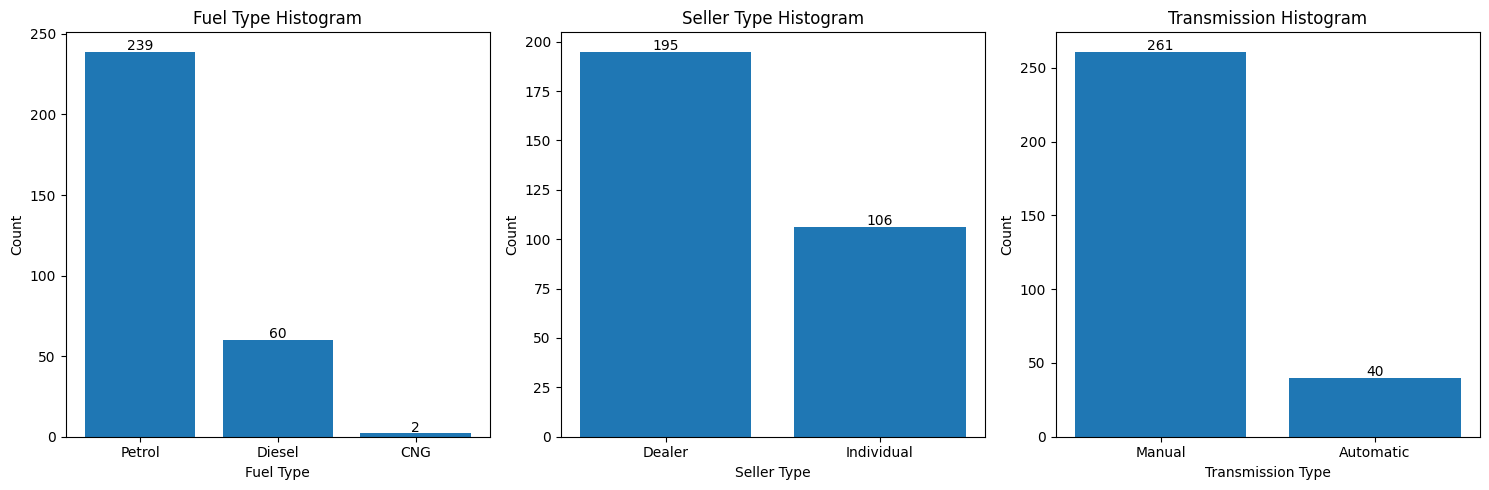

In [24]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the Fuel_Type histogram with annotations
fuel_counts = data['Fuel_Type'].value_counts()
axes[0].bar(fuel_counts.index, fuel_counts.values)
axes[0].set_title('Fuel Type Histogram')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')
for i, count in enumerate(fuel_counts):
    axes[0].text(i, count + 1, str(count), ha='center')

# Plot the Seller_Type histogram with annotations
seller_counts = data['Seller_Type'].value_counts()
axes[1].bar(seller_counts.index, seller_counts.values)
axes[1].set_title('Seller Type Histogram')
axes[1].set_xlabel('Seller Type')
axes[1].set_ylabel('Count')
for i, count in enumerate(seller_counts):
    axes[1].text(i, count + 1, str(count), ha='center')

# Plot the Transmission histogram with annotations
trans_counts = data['Transmission'].value_counts()
axes[2].bar(trans_counts.index, trans_counts.values)
axes[2].set_title('Transmission Histogram')
axes[2].set_xlabel('Transmission Type')
axes[2].set_ylabel('Count')
for i, count in enumerate(trans_counts):
    axes[2].text(i, count + 1, str(count), ha='center')

# Show the plot
plt.tight_layout()
plt.show()

#### Correlation Coefficients

From the correlation matrix, we can see that the **Selling_Price** and **Present_Price** variables are <font color = 'turquoise'>**strongly positively correlated**</font>, with a correlation coefficient of <font color='green'>**0.88**</font>. This suggests that as the present price of a car increases, its selling price tends to increase as well.

We can also notice a <font color='orange'>**weak positive correlation (0.20)**</font>  between the Present_Price and Kms_Driven variables, suggesting that cars with higher present prices tend to have higher mileage.

There is alsoa <font color = 'red'>**weak positive correlation (0.03)**</font> between the Selling_Price and Kms_Driven variables, suggesting that there is not a strong relationship between the selling price of a car and the distance it has been driven.

In [27]:
corr_matrix = data[['Selling_Price', 'Present_Price', 'Kms_Driven']].corr()
corr_matrix

,Selling_Price,Present_Price,Kms_Driven
Selling_Price,1.000000,0.878983,0.029187
Present_Price,0.878983,1.000000,0.203647
Kms_Driven,0.029187,0.203647,1.000000


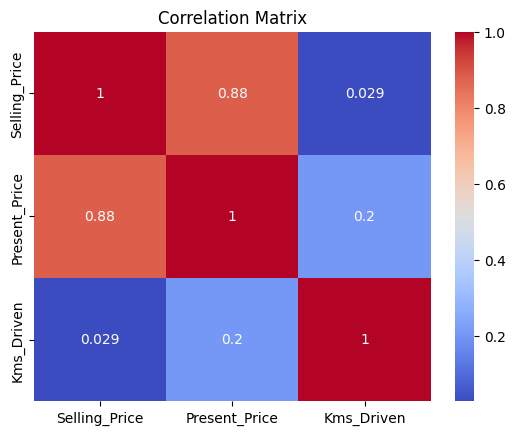

In [28]:
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Correlation between categorical and numerical data

**One common method for visualizing the relationships between a categorical variable and a numerical variable is to use box plots or violin plots. These plots can show the distribution of the numerical variable for each category of the categorical variable, allowing us to compare the central tendency, spread, and shape of the distribution for each category.**

In the below plots, we can see that there are some differences in the distribution of Selling_Price between categories.

Cars with **diesel** fuel tend to have **higher selling prices** than cars with **petrol or CNG fuel**.

Cars sold by **dealers** tend to have higher selling prices than cars sold by **individuals**. 

Cars with **Automatic** transission are more expensive that the **manual** cars.

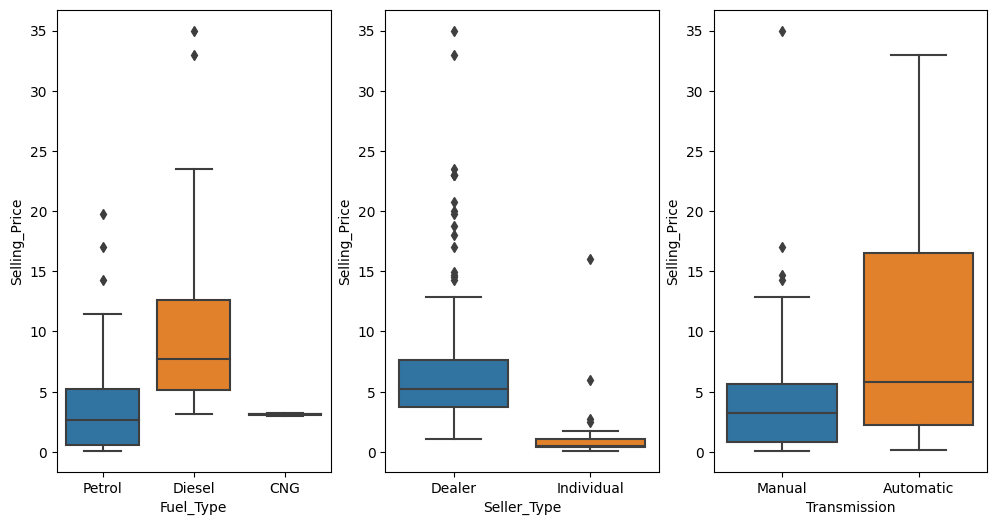

In [29]:
# Create box plots for Fuel_Type, Seller_Type, and Transmission
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, ax=axes[0])
sns.boxplot(x='Seller_Type', y='Selling_Price', data=data, ax=axes[1])
sns.boxplot(x='Transmission', y='Selling_Price', data=data, ax=axes[2])
plt.show()

#### Data Distrubution 

1. Selling_Price histogram: The majority of cars have a selling price of less than 10, with a long tail to the right indicating some more expensive outliers.
The Selling_Price density plot shows a smoothed estimate of the distribution of selling prices. It confirms that the distribution is <font color ='blue'>**right-skewed**</font>, with the peak of the distribution below 5  and a long tail to the right indicating some more expensive outliers.

2. Present_Price histogram: This plot shows the distribution of the original price of the cars in the dataset. The majority of cars have a present price of less than 10, with a long tail to the right indicating some more expensive cars.
The density plot confirms that the distribution is also <font color ='blue'>**right-skewed**</font>, with the peak of the distribution below 10  and a long tail to the right indicating some more expensive outliers.

3. Kms_Driven histogram: This plot shows the distribution of the total kilometers driven by the cars in the dataset. The majority of cars have driven less than 50,000 kilometers, with a second smaller peak around 100,000 kilometers. The density plot confirms that the distribution has two modes, one around 10,000 kilometers and the other around 100,000 kilometers.

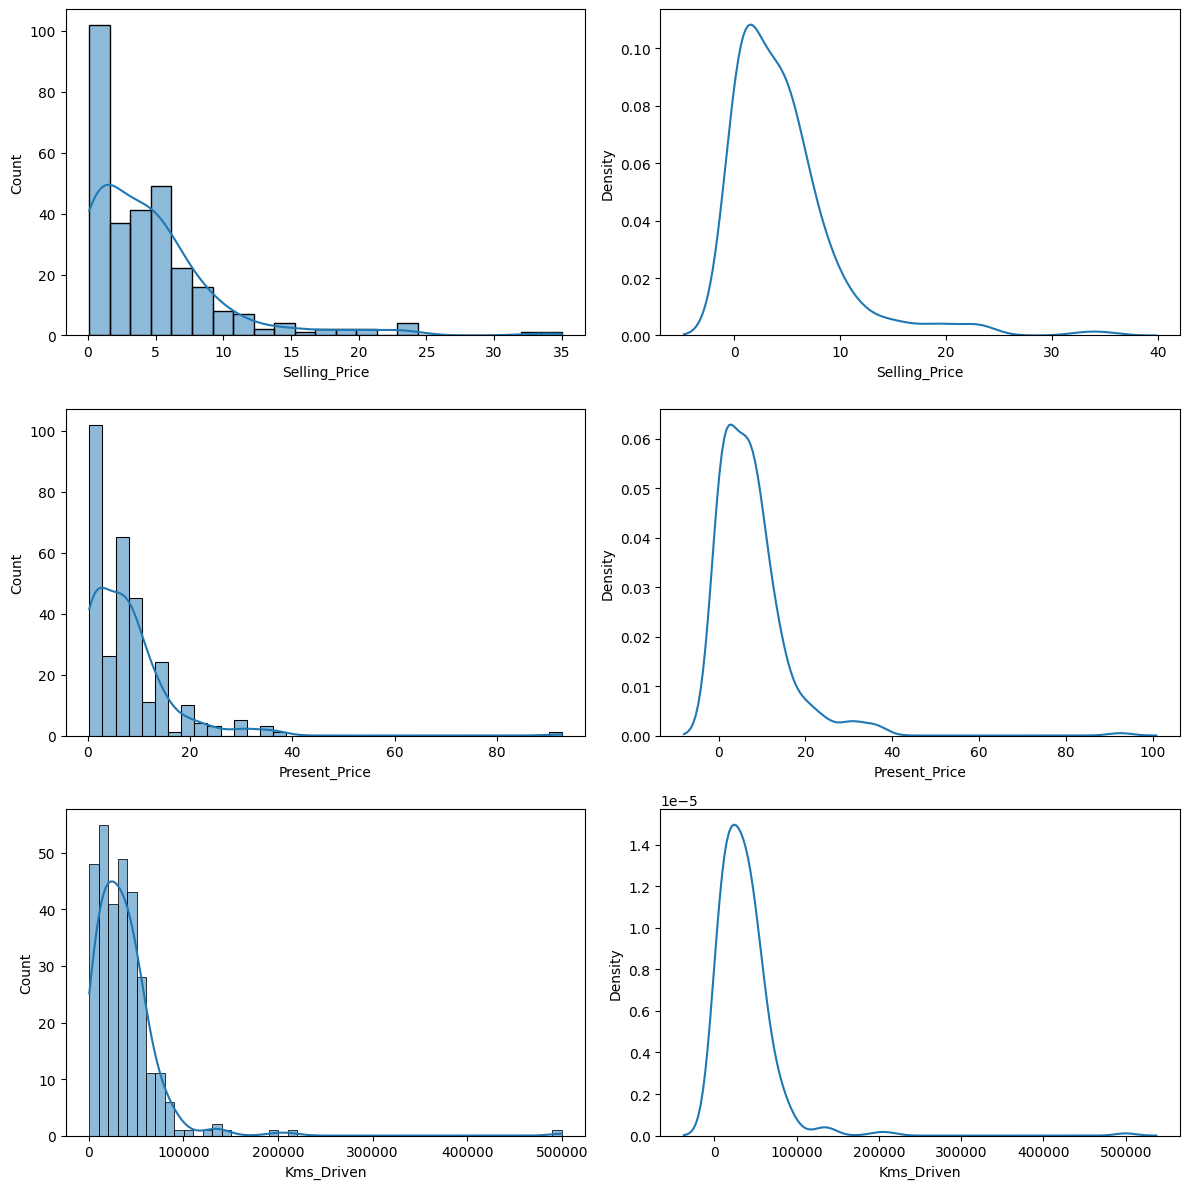

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
sns.histplot(x='Selling_Price', data=data, kde=True, ax=axes[0,0])
sns.kdeplot(x='Selling_Price', data=data, ax=axes[0,1])
sns.histplot(x='Present_Price', data=data, kde=True, ax=axes[1,0])
sns.kdeplot(x='Present_Price', data=data, ax=axes[1,1])
sns.histplot(x='Kms_Driven', data=data, kde=True, ax=axes[2,0])
sns.kdeplot(x='Kms_Driven', data=data, ax=axes[2,1])
plt.tight_layout()
plt.show()

#### The Outliers

Based on the below code, we determine that the outliers are genuine data points that are important to the analysis and should not be removed, some cars may have exceptionally high selling prices due to their rare features, high-end brands, or unique history. Removing such data points could lead to biased and inaccurate analysis.

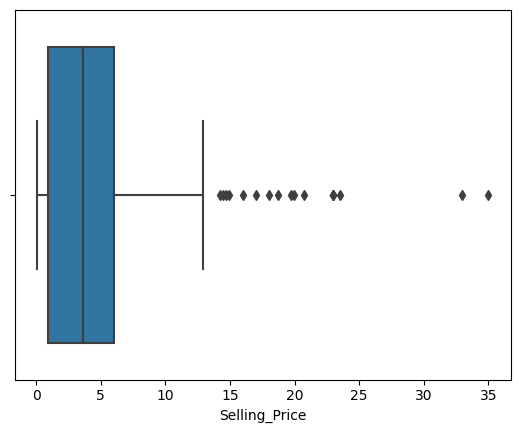

In [33]:
sns.boxplot(x=data['Selling_Price'])
plt.show()

In [55]:
from scipy import stats

# Calculate z-scores for Selling_Price column
z_scores = np.abs(stats.zscore(data['Selling_Price']))

# Set threshold for outlier detection
threshold = 3

# Find indices of outliers
outliers_indices = np.where(z_scores > threshold)[0]

print('the number of outliers is:',len(outliers_indices))
print('the indice of outliers are:',outliers_indices)

# Create a table of the outliers
outliers_table = data.iloc[outliers_indices]

outliers_table


the number of outliers is: 8
the indice of outliers are: [51 59 63 64 82 86 93 96]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
82,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0


#### Feature engineering

In [56]:
current_year = 2023
data['Age'] = current_year - data['Year']

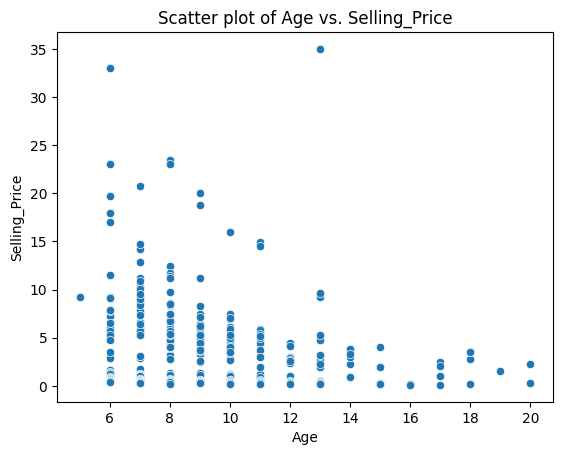

In [60]:
sns.scatterplot(x='Age', y='Selling_Price', data=data)
plt.xlabel('Age')
plt.ylabel('Selling_Price')
plt.title('Scatter plot of Age vs. Selling_Price')
plt.show()

From the scatter plot of 'Age' vs. 'Selling_Price', we can observe that there is a negative correlation between these two variables. This means that as the age of the car increases, the selling price decreases. we can conclude that 'Age' is a significant predictor of 'Selling_Price', and we should include it as a feature in our linear regression model.

#### Feature Selection 

Based on the previous analysis, we determined that we are going to use the independant variables **'Present_Price'**, **'Kms_Driven'**, **'Fuel_Type'**, **'Seller_Type'** and **'Transmission'**, to predict the target variable <font color ='red'>**Seller_Price**</font>.

#### Data Preparation

In [61]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
num_features = ['Year', 'Present_Price', 'Kms_Driven', 'Age']
data[num_features] = scaler.fit_transform(data[num_features])

In [62]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,0.128897,3.35,-0.236215,-0.256224,Petrol,Dealer,Manual,0,-0.128897
1,sx4,-0.217514,4.75,0.221505,0.155911,Diesel,Dealer,Manual,0,0.217514
2,ciaz,1.168129,7.25,0.257427,-0.773969,Petrol,Dealer,Manual,0,-1.168129
3,wagon r,-0.910335,2.85,-0.403079,-0.817758,Petrol,Dealer,Manual,0,0.910335
4,swift,0.128897,4.60,-0.087890,0.141743,Diesel,Dealer,Manual,0,-0.128897


In [63]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical features to numerical
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[cat_features]).toarray()

In [66]:
encoded_features

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [73]:
# Concatenate numerical and categorical features
X = np.concatenate((data[num_features], encoded_features), axis=1)
y = data['Selling_Price']

In [74]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Model creation

In [78]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 

# Fit the model to the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [79]:
# Predict on the test data
y_pred = regressor.predict(X_test)

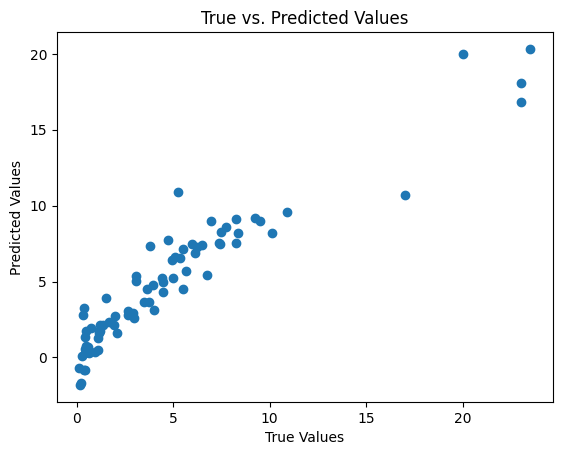

In [80]:
# Visualize predicted vs. true values using scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.show()

#### Model Evaluation 


The next step would be to evaluate the performance of the model using some metrics such as **mean squared error**, **mean absolute error**, and **R-squared score**.

<font color='tangerine'>**Mean Squared Error (MSE)**</font>: measures the average squared difference between the predicted values and the true values. In this case, the MSE is <font color ='green'>**3.24**</font>.

<font color='tangerine'> **Mean Absolute Error (MAE)**</font>: measures the average absolute difference between the predicted values and the true values. In this case, the MAE is <font color ='green'>**1.19**</font>.

<font color='tangerine'>**R-squared score**</font>: measures how well the linear regression model fits the data, with values ranging from 0 to 1. In this case, the R-squared score is <font color ='green'>**0.88**</font>, which means that the model explains **88%** of the variance in the selling price.

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 3.241835166876293
Mean Absolute Error: 1.1901829126153043
R-squared score: 0.8820048284410182


In [87]:
# Import libraries
from sklearn.model_selection import GridSearchCV

# Create a Linear Regression model
lin_reg = LinearRegression(n_jobs=-1)

# Define the parameter grid for GridSearchCV
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lin_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)



Best Parameters: {'fit_intercept': False, 'positive': True}
Best Score: 4.16532483483128


#### Save the model and scaler 

In [100]:
import pickle

# Save the model 
filename = 'linear_regression_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

# Save the scaler
filename_scaler = 'standard_scaler.pkl'
pickle.dump(scaler, open(filename_scaler, 'wb'))
